# EXPLORATORY DATA ANALYSIS (EDA)

## EDA Checklist

1. What is the question that we are trying to solve?
2. What are the data types and how to treat different types?
3. What is missing from the data and what to do about it?
4. Where are the outliers and should we care about them?
5. How to add, change or remove variables to extract more information of the data?

## Initial Setup

In [110]:
import pandas as pd
from pandas.api.types import is_categorical_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import sys
import os

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline
sns.set_context('notebook')
sns.set_style("white", {"axes.spines.right": "False", "axes.spines.top": "False"})

In [21]:
file_market = '../data/raw/estaticos_market.csv'

data_raw = pd.read_csv(file_market, index_col=0)

# What are the data types and how to treat different types?

First, let's take a look at the data

In [22]:
data_raw.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,Fals

We have 181 features from which we will verify the data types.

Which data types do we currently have? Let's split and analyse each one individually.

In [25]:
data_raw.dtypes.value_counts()

float64    144
object      27
bool         9
int64        1
dtype: int64

## Features type int64

In [26]:
data_raw_int = data_raw.select_dtypes(include='int64'); data_raw_int.columns

Index(['qt_filiais'], dtype='object')

The only feature with this data type is 'qtd_filias'. It has the correct data type according with the data dictionary.

Let's check the basic statistics for this feature.

In [56]:
data_raw_int.describe()

,qt_filiais
count,462298.000000
mean,28.737044
std,468.626094
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9647.000000


As we can see, the mean is much lower than the standard deviation, which imply that we have a very disproportional distribution. This is expected as most companies don't have branches and, therefore, we have a peak at 'qt_filiais' = 0. From the data, approximately 90% of the companies do not have branches.

In [27]:
data_raw_int[data_raw_int['qt_filiais'] == 0].count()/len(data_raw_int['qt_filiais'])

qt_filiais    0.904272
dtype: float64

At last, as the minimum and maximum values are small, we will update the type to int8, to optimize memory consumption.

In [28]:
data_raw_int = data_raw_int.astype('int8')

## Features type bool

In [29]:
data_raw_bool = data_raw.select_dtypes(include='bool'); data_raw_bool.columns

Index(['fl_matriz', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda',
       'fl_st_especial', 'fl_email', 'fl_telefone'],
      dtype='object')

According to the data dictionary, this features are all which the correct data type, boolean.

Let's take a look to see if everything is ok.

In [30]:
data_raw_bool.head()

,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone
0,True,False,False,False,False,False,False,True,True
1,True,False,False,False,True,False,False,True,True
2,True,False,False,False,True,False,False,False,True
3,True,False,False,False,False,False,False,True,True
4,True,False,False,False,False,False,False,True,True


## Features type object

In [96]:
data_raw_object = data_raw.select_dtypes(include='object'); data_raw_object.columns

Index(['id', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'idade_emp_cat', 'dt_situacao', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'fl_spa', 'fl_antt', 'fl_veiculo',
       'fl_optante_simples', 'fl_optante_simei', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'de_nivel_atividade',
       'de_indicador_telefone', 'fl_simples_irregular', 'nm_meso_regiao',
       'nm_micro_regiao', 'fl_passivel_iss', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo'],
      dtype='object')

Just by looking at the column names we can see that multiple columns start with 'fl_' which, according to the data dictionary, are boolean. Let's take a look at those.

### Features that start with 'fl_'

In [97]:
fl_object_cols = [col for col in data_raw_object.columns if 'fl_' in col]

In [98]:
data_raw_object[fl_object_cols].head()

,fl_rm,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_simples_irregular,fl_passivel_iss
0,SIM,False,False,False,True,False,False,True
1,SIM,False,False,False,NaN,NaN,False,True
2,SIM,False,False,False,True,True,False,True
3,SIM,False,False,False,True,False,False,True
4,SIM,False,False,False,True,False,False,True


Looking at the data, all but the first feature are ok, they have the object type because of the missing values, as we can see below.

In [99]:
data_raw_object[fl_object_cols].isna().sum()

fl_rm                       0
fl_spa                   1927
fl_antt                  1927
fl_veiculo               1927
fl_optante_simples      82713
fl_optante_simei        82713
fl_simples_irregular     1927
fl_passivel_iss          1927
dtype: int64

For the first feature 'fl_rm', we will transform the values to boolean.

In [100]:
data_raw_object['fl_rm'] = pd.Series(np.where(data_raw_object['fl_rm'].values == 'SIM', True, False),
          data_raw_object['fl_rm'].index)

### Other features with type object

In [101]:
other_object_cols = [col for col in data_raw_object.columns if 'fl_' not in col]; other_object_cols

['id',
 'de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_emp_cat',
 'dt_situacao',
 'nm_divisao',
 'nm_segmento',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'de_nivel_atividade',
 'de_indicador_telefone',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo']

The feature 'id' is a alphanumerical identifier of the data, let's drop it because it is not a generalizer

In [102]:
del data_raw_object['id']
other_object_cols.remove('id')

The feature 'dt_situacao' is a date, let's transform it's type.

In [103]:
data_raw_object['dt_situacao'] = pd.to_datetime(data_raw_object['dt_situacao'])
other_object_cols.remove('dt_situacao')

The remaining features are all categorical.

In [112]:
data_raw_object[other_object_cols] = data_raw_object[other_object_cols].astype('category')

## Features type float64

In [113]:
data_raw_float = data_raw.select_dtypes(include='float64'); data_raw_float.columns

Index(['idade_empresa_anos', 'vl_total_tancagem', 'vl_total_veiculos_antt',
       'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art',
       'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo',
       'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
       ...
       'min_meses_servicos_all', 'media_meses_servicos', 'max_meses_servicos',
       'min_meses_servicos', 'qt_funcionarios', 'qt_funcionarios_12meses',
       'qt_funcionarios_24meses', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'tx_rotatividade'],
      dtype='object', length=144)

In [41]:
data_raw_float.describe().T

,count,mean,std,min,25%,50%,75%,max
idade_empresa_anos,462298.0,9.948677e+00,9.615664e+00,0.016438,2.756164,6.704110,1.446575e+01,1.064329e+02
vl_total_tancagem,280.0,3.201429e+01,8.128017e+01,1.000000,15.000000,15.000000,3.000000e+01,1.215000e+03
vl_total_veiculos_antt,176.0,3.818182e+00,6.797555e+00,0.000000,1.000000,2.000000,4.000000e+00,5.000000e+01
vl_total_veiculos_leves,30684.0,2.244329e+00,9.572536e+00,0.000000,0.000000,1.000000,2.000000e+00,4.890000e+02
vl_total_veiculos_pesados,30684.0,1.177813e+00,6.589059e+00,0.000000,0.000000,0.000000,1.000000e+00,3.630000e+02
qt_art,6590.0,5.769044e+00,2.545095e+01,1.000000,1.000000,2.000000,4.000000e+00,1.017000e+03
vl_total_veiculos_pesados_grupo,460371.0,3.591801e+00,7.260035e+01,0.000000,0.000000,0.000000,0.000000e+00,9.782000e+03
vl_total_veiculos_leves_grupo,460371.0,4.869918e+01,1.206697e+03,0.000000,0.000000,0.000000,0.000000e+00,1.220900e+05
vl_total_tancagem_grupo,1760.0,1.345972e+02,6.837745e+02,1.000000,15.000000,15.000000,6.625000e+01,1.192200e+04
vl_total_veiculos_antt_grupo,336.0,1.593452e+01,2.970866e+01,0.000000,1.000000,3.000000,8.000000e+00,1.080000e+02


Looking at the data, we don't have any feature that has the wrong data type

At last, we will merge all the dataframes into one again.

In [114]:
dfs = [data_raw_bool, data_raw_float, data_raw_int, data_raw_object]
data_tipos = pd.concat(dfs,axis=1)

# What is missing from the data and what to do about it?

Here is how we will deal with missing data:
- For numeric columns, we replace missing values with the median/mean of that column and introduce a new boolean column that is true for any record where we replace a missing value.
- For nonnumeric columns simply is to leave them as-is with np.nan values.

I learned this method from Jermey Howard, from FastAI, the former CEO of Kaggle.

## Numerical features

In [123]:
data_tipos.dtypes.value_counts()

float64           144
bool               10
object              7
datetime64[ns]      1
category            1
category            1
category            1
category            1
int8                1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
category            1
dtype: int64

In [ ]:
data_tipos.select_dtypes(include=['int8','float64'])

In [118]:
def fix_missing_num(data, col):
    data[col+'_na'] = pd.isnull(data[col])
    data[col].fillna(data[col].median(), inplace=True)

We are using the median to choose a number that is not going to skew the distribution of the data in that column. We are including a feature that we have replaced the missing data, because sometimes missing values are strongly predictive. This strategy is supported by recent academic research: https://hal.archives-ouvertes.fr/hal-02024202v2

,fl_optante_simples,fl_optante_simei,fl_veiculo,fl_passivel_iss,fl_simples_irregular,fl_spa,fl_antt
0,True,False,False,True,False,False,False
1,NaN,NaN,False,True,False,False,False
2,True,True,False,True,False,False,False
3,True,False,False,True,False,False,False
4,True,False,False,True,False,False,False


Let's replace the missing values with the mode for each feature

In [72]:
for col in data_filt_non_numeric.columns:
    data_filt[col].fillna(data_filt[col].mode()[0], inplace=True)

### Numerical features

In [59]:
data_filt_numeric = data_filt[na_col].select_dtypes(include='float64')
describe_numeric = data_filt_numeric.describe().T; describe_numeric

,count,mean,std,min,25%,50%,75%,max
qt_socios_st_regular,307381.0,1.396082e+00,2.578793e+00,1.00,1.00,1.00,1.00,1.790000e+02
idade_minima_socios,310696.0,4.135523e+01,1.251492e+01,-2.00,32.00,40.00,50.00,1.270000e+02
idade_media_socios,310696.0,4.281645e+01,1.262645e+01,-2.00,33.00,42.00,51.00,1.270000e+02
idade_maxima_socios,310696.0,4.434413e+01,1.393039e+01,-2.00,34.00,43.00,54.00,1.270000e+02
empsetorcensitariofaixarendapopulacao,318469.0,1.308006e+03,1.161889e+03,100.00,673.23,946.68,1518.08,7.509384e+04
qt_socios_pj,347207.0,1.964534e-02,1.951660e-01,0.00,0.00,0.00,0.00,1.300000e+01
qt_socios,347207.0,1.496326e+00,3.276626e+00,1.00,1.00,1.00,2.00,2.460000e+02
qt_socios_pf,347207.0,1.476681e+00,3.258079e+00,0.00,1.00,1.00,2.00,2.460000e+02
nu_meses_rescencia,417022.0,2.500725e+01,9.679799e+00,0.00,22.00,23.00,25.00,6.600000e+01
vl_faturamento_estimado_aux,434785.0,8.020911e+05,3.099979e+07,0.00,164851.20,210000.00,210000.00,1.454662e+10


In [57]:
describe_numeric['CV'] = describe_numeric['std']/describe_numeric['mean']; describe_na_cols

KeyError: 'std'

In [ ]:
Para variáveis com altas variâncias, CV>1, iremos utilizar

In [ ]:
data_filt['qt_socios_st_regular'].fillna(value=data_filt['qt_socios_st_regular'].mean(), inplace=True)

# Where are the outliers and should we care about them?

In [205]:
data_num = data_filt.select_dtypes(include=['int8', 'float64'])

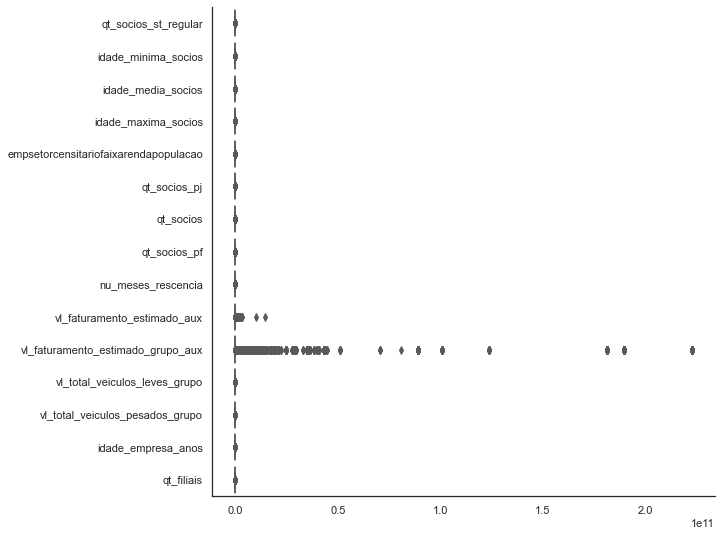

In [215]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
sns.boxplot(data=data_num, orient="h", palette="Set2")

Conseguimos ver que as colunas vl_faturamento_estimado_aux e vl_faturamento_estimado_grupo_aux merecem ser investigadas.

Aproximando o gráfico, vamos mostrar variáveis com a mesma ordem de grandeza para melhor visualização

## Features that start with 'idade_'

(0.0, 200.0)

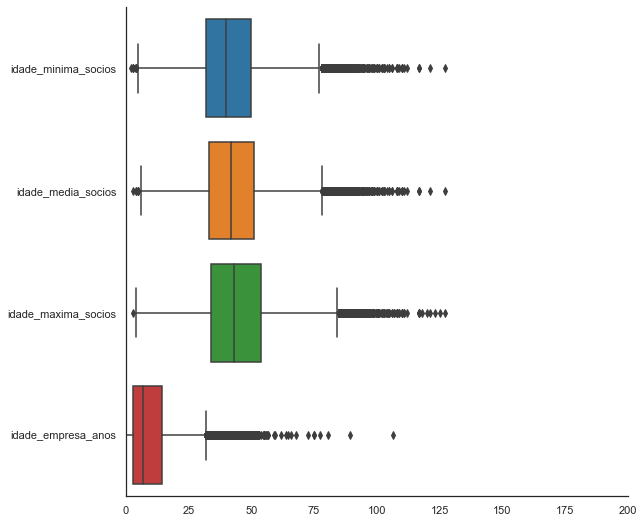

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
sns.boxplot(data=data_num[[col for col in data_num.columns if 'idade_' in col]], orient="h")
plt.xlim(0, 200)

Como podemos ver, possuímos diversos outliers.
Porém, de acordo com a característica das colunas, não podemos descarta-los, já que fazem parte da descrição da empresa.

Ao olhar as estatisticas básicas dessas colunas, vemos que existem idades negativas.

In [233]:
data_num[[col for col in data_num.columns if 'idade_' in col]].describe()

,idade_minima_socios,idade_media_socios,idade_maxima_socios,idade_empresa_anos
count,310696.000000,310696.000000,310696.000000,462298.000000
mean,41.355225,42.816452,44.344131,9.948677
std,12.514921,12.626447,13.930385,9.615664
min,-2.000000,-2.000000,-2.000000,0.016438
25%,32.000000,33.000000,34.000000,2.756164
50%,40.000000,42.000000,43.000000,6.704110
75%,50.000000,51.000000,54.000000,14.465753
max,127.000000,127.000000,127.000000,106.432877


Considerando a legislação brasileira, menores de 16 anos não podem ser sócios de empresas. Assim, vamos substituir todas as idades inferiores a esse valor pelo mínimo permitido por lei.

http://newaccount.com.br/qual-idade-minima-para-ser-socio-de-uma-empresa/

In [244]:
data_filt.loc[data_filt['idade_maxima_socios']<16, 'idade_maxima_socios'] = 16
data_filt.loc[data_filt['idade_minima_socios']<16, 'idade_minima_socios'] = 16
data_filt.loc[data_filt['idade_media_socios']<16, 'idade_media_socios'] = 16

## Features that start with 'qt_'

In [247]:
data_num[[col for col in data_num.columns if 'qt_' in col]].describe()

,qt_socios_st_regular,qt_socios_pj,qt_socios,qt_socios_pf,qt_filiais
count,307381.000000,347207.000000,347207.000000,347207.000000,462298.000000
mean,1.396082,0.019645,1.496326,1.476681,0.507703
std,2.578793,0.195166,3.276626,3.258079,8.836834
min,1.000000,0.000000,1.000000,0.000000,-128.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,2.000000,2.000000,0.000000
max,179.000000,13.000000,246.000000,246.000000,127.000000


In [251]:
data_filt.loc[data_filt['qt_filiais']<0, 'qt_filiais'] = 0

Como podemos ver, temos valores negativos na coluna qt_filiais. Vamos substituir esses valores por 0.

## Features that start with 'vl_'

In [252]:
data_num[[col for col in data_num.columns if 'vl_' in col]].describe()

,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
count,4.347850e+05,4.347850e+05,460371.000000,460371.000000
mean,8.020911e+05,3.367205e+08,48.699177,3.591801
std,3.099979e+07,7.114614e+09,1206.696804,72.600352
min,0.000000e+00,4.104703e+04,0.000000,0.000000
25%,1.648512e+05,1.854576e+05,0.000000,0.000000
50%,2.100000e+05,2.100000e+05,0.000000,0.000000
75%,2.100000e+05,2.100000e+05,0.000000,0.000000
max,1.454662e+10,2.227618e+11,122090.000000,9782.000000


vl_total_veiculos_leves_grupo: Valor econômico de veículos leves do grupo econômico da companhia

In [253]:
data_num['vl_total_veiculos_leves_grupo'].value_counts()

0.0         424180
1.0          15738
2.0           5232
3.0           2610
4.0           1569
5.0           1099
6.0            781
7.0            618
8.0            512
10.0           408
9.0            384
35064.0        373
11.0           338
6751.0         281
390.0          270
11256.0        265
13.0           239
15.0           234
12.0           207
26.0           186
25.0           162
16.0           155
14.0           144
21.0           130
22.0           112
20.0           109
27.0           107
399.0          106
19.0           103
55.0           103
124.0           97
17.0            97
199.0           96
604.0           96
67.0            89
18.0            89
96.0            79
231.0           78
147.0           75
24.0            75
23.0            65
34.0            65
71.0            64
28.0            63
39.0            60
29.0            60
63.0            57
243.0           55
479.0           55
44.0            48
116.0           47
41.0            45
274.0       

# How to add, change or remove variables to extract more information of the data?

In [77]:
def get_portfolio(file, used_cols, df=None, nrows=500):
    if file:
        df = pd.read_csv(file)
        return df[used_cols]
    else:
        if df is None or nrows > df_market.shape[0]:
            return None
        else:
            return pd.DataFrame(np.random.choice(df['id'].values, nrows), columns=['id'])

In [72]:
def get_market(file, threshold=0.5):
    df_market = pd.read_csv(file_market, index_col=0)
    thresh = len(df_market) * threshold
    df_market.dropna(thresh = thresh, axis = 1, inplace = True)
    columns = df_market.columns
    df_market['dt_situacao'] = pd.to_datetime(df_market['dt_situacao'])
    df_market['fl_rm'] = df_market['fl_rm'].replace(to_replace='SIM', value=True).replace(to_replace='NAO', value=False).astype('bool')
    df_market['id'] = df_market['id'].astype('string')
    df_market.loc[:,df_market.dtypes == 'object'] = df_market.loc[:,df_market.dtypes == 'object'].astype('category')
    df_market.loc[:,df_market.dtypes == 'float64'] = df_market.loc[:,df_market.dtypes == 'float64'].astype('float16')
    df_market.loc[:,df_market.dtypes == 'int64'] = df_market.loc[:,df_market.dtypes == 'int64'].astype('int16')
    return df_market, columns

In [73]:
df_market, used_cols = get_market(file_market)

In [78]:
df_port = get_portfolio(file_portfolio1, used_cols)

In [79]:
df_port

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,False,False,True,False,2018-03-06,False,False,False,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,NaN,0,0,NaN,PI,CINZA,SEM INFORMACAO,NaN,BAIXA,False,379.96,SUDOESTE PIAUIENSE,SAO RAIMUNDO NONATO,False,1.0,1.0,0.0,45.0,45.0,45.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,False,False,False,False,False,2012-03-29,False,True,True,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,False,0,0,False,MA,VERDE,ACIMA DE 1 ANO,22.0,MEDIA,False,1865.61,CENTRO MARANHENSE,MEDIO MEARIM,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 360.000,01 A R$ 1.500.000,00",210000.0,1000915.2,4
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,False,False,False,True,False,2010-10-26,False,False,False,SIM,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,True,0,0,True,MA,AZUL,ACIMA DE 1 ANO,24.0,MEDIA,False,798.12,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,False,1.0,1.0,0.0,54.0,54.0,54.0,1.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,False,False,False,False,False,2005-11-03,False,False,False,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,True,0,0,True,RN,VERDE,ACIMA DE 1 ANO,26.0,ALTA,False,608.47,OESTE POTIGUAR,UMARIZAL,False,1.0,1.0,0.0,40.0,40.0,40.0,1.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,False,False,False,False,False,2005-11-03,False,True,True,SIM,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False,True,0,0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,880.71,LESTE POTIGUAR,NATAL,False,2.0,2.0,0.0,33.0,33.0,33.0,1.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 4.800.000,01 A R$ 10.000.000,00",3029140.8,5872824.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,4e2353206c04c6a8c097252c89f6970594f0796676bba5...,True,SOCIEDADE EMPRESARIA LIMITADA,MA,ENTIDADES EMPRESARIAIS,BENS DE CONSUMO,INDUSTRIA,27.660274,> 20,False,False,False,False,False,2005-11-03,False,False,False,SIM,CONFECCAO DE ARTIGOS DO VESTUARIO E ACESSORIOS,INDUSTRIAS DE TRANSFORMACAO,False,False,False,False,0,0,False,MA,LARANJA,ACIMA DE 1 ANO,23.0,MEDIA,False,1585.53,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 36

In [126]:

df_portfolio['fl_client'] = 1
df_portfolio = df_portfolio[['id','fl_client']]

,id
0,a27ea291ba7370cbe3e84b7d1fc4086a4560db57d042fe...
1,19d45d3d439b94a726876d144193988a2d8f131298d433...
2,3f0376aa09efe3827cbcec46641af8eb8ba125c9cb6c86...
3,b0a53ae5c4acdf4ffa397487e64f83dc39fcbeee8f6485...
4,05fe6570fe253849b4de0892bc379f0c0da60863e4fdcc...
5,c012edb3bebee75f7577d91ea4001102bd7f76dfb0e73b...
6,1b4d2f68812a2b17e94ffd12569b87050016d3f3add012...
7,bc58ba2aef77f53039de659dbd9523f93225cecdff7d60...
8,a6242050d1dbcd82fc4388991618519ac315fcc368d384...
9,94f6bef4261380bca264183411b406f8825fb6a32484b9...


462298

In [128]:
df = pd.merge(df_market, df_portfolio, how='left', on='id')

In [130]:
df['fl_client'].fillna(0, inplace=True)

In [132]:
X, y = df.drop('fl_client', axis=1), df['fl_client']